In [3]:

%matplotlib inline
#matplotlib.use('TkAgg')
#import matplotlib.pyplot as pl
import matplotlib
matplotlib.use('TkAgg')
import pylab as pl
from psychopy import monitors, visual, tools
import os
import numpy as np
from os.path import expanduser
home = expanduser("~")
import shutil
import math
import cPickle as pkl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.ndimage.filters import generic_filter as gf


monitor_dir = '~/Repositories/retinotopy-mapper/protocols/monitors'
psychopy_monitor_dir = '~/.psychopy2/monitors'

if '~' in monitor_dir:
    monitor_dir = monitor_dir.replace('~', home)

calibs = [c for c in os.listdir(monitor_dir) if c.endswith('calib')]
calib_names = [c[:-6] for c in calibs]

if '~' in psychopy_monitor_dir:
   psychopy_monitor_dir = psychopy_monitor_dir.replace('~', home)
# Copy saved monitor calibs to local .psychopy dir:
if not os.path.exists(psychopy_monitor_dir):
    os.makedirs(psychopy_monitor_dir)
existing_calibs = [c for c in os.listdir(psychopy_monitor_dir) if c.endswith('calib')]
missing_calibs = [c for c in calibs if c not in existing_calibs]    
for c in missing_calibs:
    shutil.copyfile(os.path.join(monitor_dir,c), os.path.join(psychopy_monitor_dir,c))



In [4]:
for idx,calib in enumerate(calib_names):
    print idx, calib

mon_idx = input('Select IDX of monitor to use: ')
mon = monitors.Monitor(calib_names[mon_idx])


0 AQUOS
1 testMonitor
2 AQUOS2
3 AQUOS3
4 syncmaster2433BW
5 AQUOS_far
6 DELL22
Select IDX of monitor to use: 0


In [5]:
# from math import atan2, degrees

# deg_per_px = degrees(atan2(.5*width, distance)) / (.5*resolution[0])
# width_deg = resolution[0] * deg_per_px
# print width_deg

In [6]:
distance = mon.getDistance()
width = mon.getWidth()
resolution = mon.getSizePix()
aspect = float(resolution[0])/float(resolution[1])
height = width * (1./aspect)
pix_cm = float(width)/float(resolution[0])
print "Pixel size (cm):", pix_cm

width_deg = 2*np.arctan((width)/(2*distance)) * (180./math.pi)
height_deg = 2*np.arctan((height)/(2*distance)) * (180./math.pi)

center = [width_deg/2., height_deg/2.]
interval = 10. 

print "Distance (cm):", distance
print "Resolution:", resolution
print "Width, Height (cm):", width, height
print "Width, Height (deg):", width_deg, height_deg

# deg_per_px = degrees(atan2(.5*width, distance)) / (.5*resolution[0])
# width_deg = resolution[0] * deg_per_px
# print width_deg

bar_width = 1.0
print "Bar (deg):", bar_width

Pixel size (cm): 0.0683823529412
Distance (cm): 25.0
Resolution: [1360, 768]
Width, Height (cm): 93.0 52.5176470588
Width, Height (deg): 123.471991703 92.8135948498
Bar (deg): 1.0


In [7]:
total_length = np.copy(width)

total_length_deg = tools.monitorunittools.cm2deg(total_length, mon, correctFlat=False) + bar_width
print "Total length (deg):", total_length_deg
print "Distance to center (deg): ", total_length_deg/2.

Total length (deg): 214.119450014
Distance to center (deg):  107.059725007


### Get intervals of N degrees, centered around 0

In [8]:
# azimuth_pts = list(np.arange(center[0], width_deg+10, interval))
# prev = center[0]
# while prev>0:
#     azimuth_pts.append(prev-interval)
#     prev -= interval
# azimuth_pts = sorted(azimuth_pts)

# elevation_pts = list(np.arange(center[1], height_deg+10, interval))
# prev = center[1]
# while prev>0:
#     elevation_pts.append(prev-interval)
#     prev -= interval
# elevation_pts = sorted(elevation_pts)

In [9]:
source = '/nas/volume1/widefield/data'
# animal = 'JR040W' # 'JR042W'
# session = '20170307' #20170621'
animal = 'JR042W'
session = '20170621'


#fn = '20170621_JR042W_r2_all_struct.pkl'

data_dir = os.path.join(source, animal, session)


JR042W_20170621.tif
(246, 328)


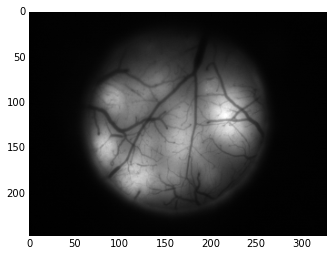

In [10]:
# Surface image:
from libtiff import TIFF
if 'surface' in os.listdir(data_dir):
    surface_dir = os.path.join(data_dir, 'surface')
else:
    surface_dir = os.path.join(source, animal, 'surface') #, '*%s*.tif' % session)

surface_fn = [f for f in os.listdir(surface_dir) if f.endswith('.tif') and session in f][0]
print surface_fn
surface_impath = os.path.join(surface_dir, surface_fn)

surftiff = TIFF.open(surface_impath, mode='r')
surface = surftiff.read_image().astype('float')
surftiff.close()
pl.imshow(surface, cmap='gray')
print surface.shape

In [11]:
# ============================================================================
# SINGLE condition runs:
# ============================================================================

with open(os.path.join(data_dir, fn), 'rb') as f:
    structs = pkl.load(f)
    

experiments = structs.keys()
runs = structs[experiments[0]].keys()

print experiments
for idx,run in enumerate(runs):
    print idx, run

curr_experiment = experiments[0]
az_run = runs[5]
el_run = runs[1]

print curr_experiment
print "AZ:", az_run
print "EL:", el_run


structs[curr_experiment][az_run].keys()

az_phasemap = structs[curr_experiment][az_run]['phase_map']
az_ratiomap = structs[curr_experiment][az_run]['ratio_map']

el_phasemap = structs[curr_experiment][el_run]['phase_map']
el_ratiomap = structs[curr_experiment][el_run]['ratio_map']

NameError: name 'fn' is not defined

In [59]:
az_condtype = 'Left'
el_condtype = 'Top'

In [60]:
# ============================================================================
# COMBO condition runs:
# ============================================================================

condinfo_path = os.path.join(data_dir, 'composite', 'figures', 'CONDS.pkl')
with open(condinfo_path, 'rb') as f:
    conds = pkl.load(f)
print conds.keys()

if az_condtype=='Right':
    azdict = conds['right']
elif az_condtype=='Left':
    azdict = conds['left']
if el_condtype=='Top':
    eldict = conds['top']
elif el_condtype=='Bottom':
    eldict = conds['bottom']
print azdict.keys()

az_phasemap = azdict['phase']
az_ratiomap = azdict['ratio']

el_phasemap = eldict['phase']
el_ratiomap = eldict['ratio']

['top', 'right', 'left', 'bottom']
['phase', 'averaging', 'ratio', 'condition', 'runs_to_use']


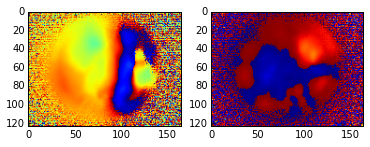

In [61]:

pl.subplot(1,2,1); pl.imshow(az_phasemap)
pl.subplot(1,2,2); pl.imshow(el_phasemap)

In [62]:
# Check dimensions:
from skimage.measure import block_reduce

if not az_phasemap.shape==surface.shape:
    reduce_val = surface.shape[0]/az_phasemap.shape[0]
    print reduce_val
    if reduce_val>1:
        surface = block_reduce(surface, (reduce_val, reduce_val), func=np.mean)
        print surface.shape
    elif reduce_val<1:
        reduce_val = 1./reduce_val
        az_phasemap = block_reduce(az_phasemap, (reduce_val, reduce_val), func=np.mean)
        el_phasemap = block_reduce(el_phasemap, (reduce_val, reduce_val), func=np.mean)
        az_ratiomap = block_reduce(az_ratiomap, (reduce_val, reduce_val), func=np.mean)
        el_ratiomap = block_reduce(el_ratiomap, (reduce_val, reduce_val), func=np.mean)

In [63]:
az_ratiomap.max()

0.10052790686468749

In [64]:
min_thr = min([az_ratiomap.max(), el_ratiomap.max()]) * 0.1 # 0.003
print min_thr
print az_ratiomap.shape

0.0100527906865
(123, 164)


In [65]:
# Convert to continous range:

az_phase = -1 * az_phasemap
az_phase = az_phase % (2*np.pi)

el_phase = -1 * el_phasemap
el_phase = el_phase % (2*np.pi)

<matplotlib.colorbar.Colorbar instance at 0x7f83f9477dd0>

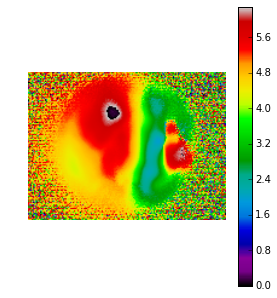

In [66]:
pl.figure(figsize=(15,5))
pl.subplot(1,3,1); pl.imshow(az_phase, cmap='spectral'); pl.axis('off')
pl.colorbar()

(-0.5, 163.5, 122.5, -0.5)

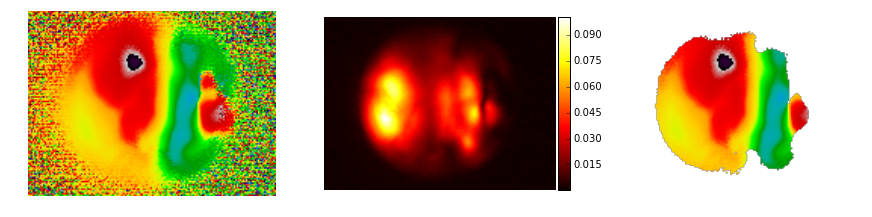

In [67]:
phasemin = 0
phasemax = 2*np.pi

pl.figure(figsize=(15,5))
pl.subplot(1,3,1); pl.imshow(az_phase, cmap='spectral'); pl.axis('off')
ax=pl.subplot(1,3,2); im=pl.imshow(az_ratiomap, cmap='hot'); pl.axis('off'); 
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
pl.colorbar(im, cax=cax)

az_phasemap_thr = np.copy(az_phase)
az_phasemap_thr[az_ratiomap<=min_thr] = np.nan

pl.subplot(1,3,3); pl.imshow(az_phasemap_thr, cmap='spectral'); pl.axis('off')

(-0.5, 163.5, 122.5, -0.5)

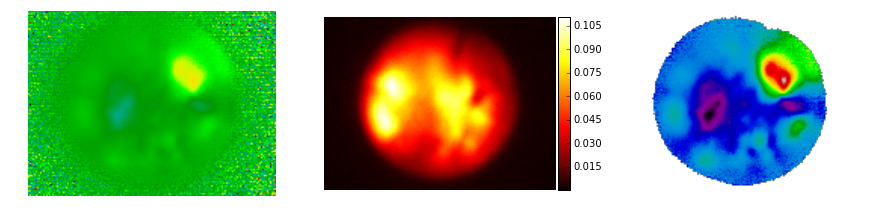

In [68]:
pl.figure(figsize=(15,5))
pl.subplot(1,3,1); pl.imshow(el_phase, cmap='spectral'); pl.axis('off')
ax=pl.subplot(1,3,2); im=pl.imshow(el_ratiomap, cmap='hot'); pl.axis('off'); 
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
pl.colorbar(im, cax=cax)

el_phasemap_thr = np.copy(el_phase)
el_phasemap_thr[el_ratiomap<=min_thr] = np.nan

pl.subplot(1,3,3); pl.imshow(el_phasemap_thr, cmap='spectral'); pl.axis('off')

In [69]:
# Low-pass filter phase map w/ uniform circular kernel:

radius = 2
kernel = np.zeros((2*radius+1, 2*radius+1))
y,x = np.ogrid[-radius:radius+1, -radius:radius+1]
mask = x**2 + y**2 <= radius**2
kernel[mask] = 1

#kernel

In [70]:
az_phasemap_filt = gf(az_phase, np.min, footprint=kernel)
el_phasemap_filt = gf(el_phase, np.min, footprint=kernel)

(-0.5, 163.5, 122.5, -0.5)

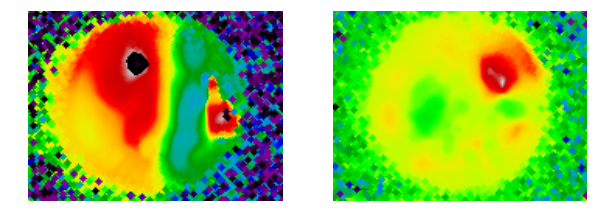

In [71]:
pl.figure(figsize=(10,5))
pl.subplot(1,2,1); pl.imshow(az_phasemap_filt, cmap='spectral'); pl.axis('off')
pl.subplot(1,2,2); pl.imshow(el_phasemap_filt, cmap='spectral'); pl.axis('off')

(-0.5, 163.5, 122.5, -0.5)

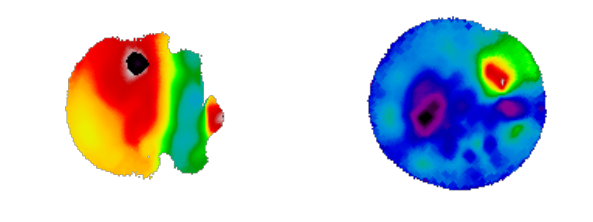

In [72]:
az_phasemap_thresh = np.copy(az_phasemap_filt)
az_phasemap_thresh[az_ratiomap<=min_thr] = np.nan

el_phasemap_thresh = np.copy(el_phasemap_filt)
el_phasemap_thresh[el_ratiomap<=min_thr] = np.nan

pl.figure(figsize=(10,5))
pl.subplot(1,2,1); pl.imshow(az_phasemap_thresh, cmap='spectral'); pl.axis('off')
pl.subplot(1,2,2); pl.imshow(el_phasemap_thresh, cmap='spectral'); pl.axis('off')

### Load Frame Log to get positions:

In [73]:
import pandas as pd

In [74]:
# az_condtype = az_run.split('_')[0]
# az_runnum = az_run.split('_')[1].split('run')[1]

# el_condtype = el_run.split('_')[0]
# el_runnum = el_run.split('_')[1].split('run')[1]

# print "AZ:", az_condtype, az_runnum
# print "EL:", el_condtype, el_runnum

# az_log_fn = 'framelog_%s_%s.txt' % (az_condtype, az_runnum)
# az_logpath = os.path.join(data_dir, curr_experiment, az_log_fn)
# print az_logpath
# az_info = pd.DataFrame.from_csv(az_logpath, header=0, sep='\t ', index_col=None)


# el_log_fn = 'framelog_%s_%s.txt' % (el_condtype, az_runnum)
# el_logpath = os.path.join(data_dir, curr_experiment, el_log_fn)
# print el_logpath
# el_info = pd.DataFrame.from_csv(el_logpath, header=0, sep='\t ', index_col=None)

# xpos = np.array(az_info['xpos']) + az_info['xpos'][0]
# ypos = np.array(el_info['ypos']) + el_info['ypos'][0]

### Convert to CM, draw iso-contours on monitor:

In [75]:
# lincoord_x = np.array([tools.monitorunittools.deg2cm(x, mon) for x in xpos])
# lincoord_y = np.array([tools.monitorunittools.deg2cm(y, mon) for y in ypos])

In [76]:
C2A_cm = width/2.
C2T_cm = height/2.
C2P_cm = width/2.
C2B_cm = height/2.
print "center 2 Top/Anterior:", C2T_cm, C2A_cm

center 2 Top/Anterior: 26.2588235294 46.5


In [77]:
mapx = np.linspace(-1*C2A_cm, C2P_cm, resolution[0])
mapy = np.linspace(C2T_cm, -1*C2B_cm, resolution[1])

lin_coord_x, lin_coord_y = np.meshgrid(mapx, mapy, sparse=False)

In [78]:
mapcorX, mapcorY = np.meshgrid(range(resolution[0]), range(resolution[1]))

In [79]:
interval = 10

In [80]:
short_axis = False

(-0.5, 1359.5, 767.5, -0.5)

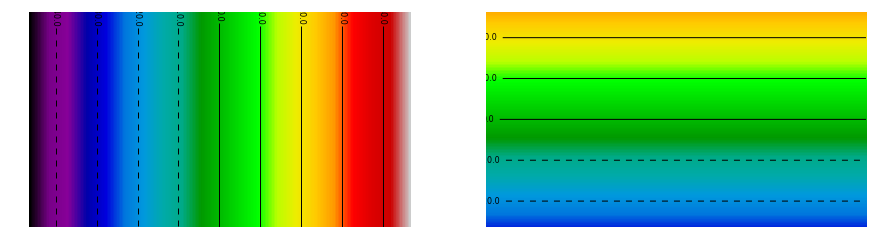

In [81]:
linminW = lin_coord_x.min()
linmaxW = lin_coord_x.max()

linminH = lin_coord_y.min()
linmaxH = lin_coord_y.max()

cmap='spectral'

f1 = pl.figure(figsize=(15,5))

pl.subplot(1,2,1)

currfig = pl.imshow(lin_coord_x, vmin=linminW, vmax=linmaxW,  cmap=cmap)
levels1 = range(int(np.floor(lin_coord_x.min() / interval) * interval), 
                int((np.ceil(lin_coord_x.max() / interval) + 1) * interval), interval)


im1 = pl.contour(mapcorX, mapcorY, lin_coord_x, levels1, colors='k', linewidth=2)
pl.clabel(im1, levels1, fontsize=8, inline=3, fmt='%1.1f') #, inline_spacing=2, manual=label_pos)
#f1.colorbar(currfig, ticks=levels1)
pl.axis('off')

pl.subplot(1,2,2)
if short_axis is True:
    curr_fig = pl.imshow(lin_coord_y, vmin=linminH, vmax=linmaxH, cmap=cmap) #pl.colorbar()
else:
    curr_fig = pl.imshow(lin_coord_y, vmin=linminW, vmax=linmaxW, cmap=cmap) #pl.colorbar()

levels2 = range(int(np.floor(lin_coord_y.min() / interval) * interval), 
                int((np.ceil(lin_coord_y.max() / interval) + 1) * interval), interval)

im2 = pl.contour(mapcorX, mapcorY, lin_coord_y, levels2, colors='k', linewidth=2)
pl.clabel(im2, levels2, fontsize=8, inline=3, fmt='%1.1f') #, inline_spacing=2, manual=label_pos)
pl.axis('off')

### PLOT CONTOUR MAPS:

In [82]:
imsize = az_phasemap_thresh.shape
print imsize

(123, 164)


In [83]:
def convert_values(oldval, newmin, newmax, oldmax=phasemax, oldmin=phasemin):
    oldrange = (oldmax - oldmin)  
    newrange = (newmax - newmin)  
    newval = (((oldval - oldmin) * newrange) / oldrange) + newmin
    return newval


In [84]:

az_phasemap_lincoord = np.copy(az_phasemap_thresh)
el_phasemap_lincoord = np.copy(el_phasemap_thresh)

for x in range(az_phasemap_thresh.shape[0]):
    for y in range(az_phasemap_thresh.shape[1]):
        if not np.isnan(az_phasemap_thresh[x,y]):
            az_phasemap_lincoord[x,y] = convert_values(az_phasemap_thresh[x,y], linminW, linmaxW)
            if short_axis is True:
                el_phasemap_lincoord[x,y] = convert_values(el_phasemap_thresh[x,y], linminH, linmaxH)
            else:
                el_phasemap_lincoord[x,y] = convert_values(el_phasemap_thresh[x,y], linminW, linmaxW)
                
        
            
            #az_phasemap_thr[x,y], linmin, linmax

#### Set contour params:

In [85]:
linmin = lin_coord_x.min()
linmax = lin_coord_x.max()
cmap='gist_rainbow'
fontsize = 32
linecolor = 'w'
linewidth = 60

import matplotlib.gridspec as gridspec


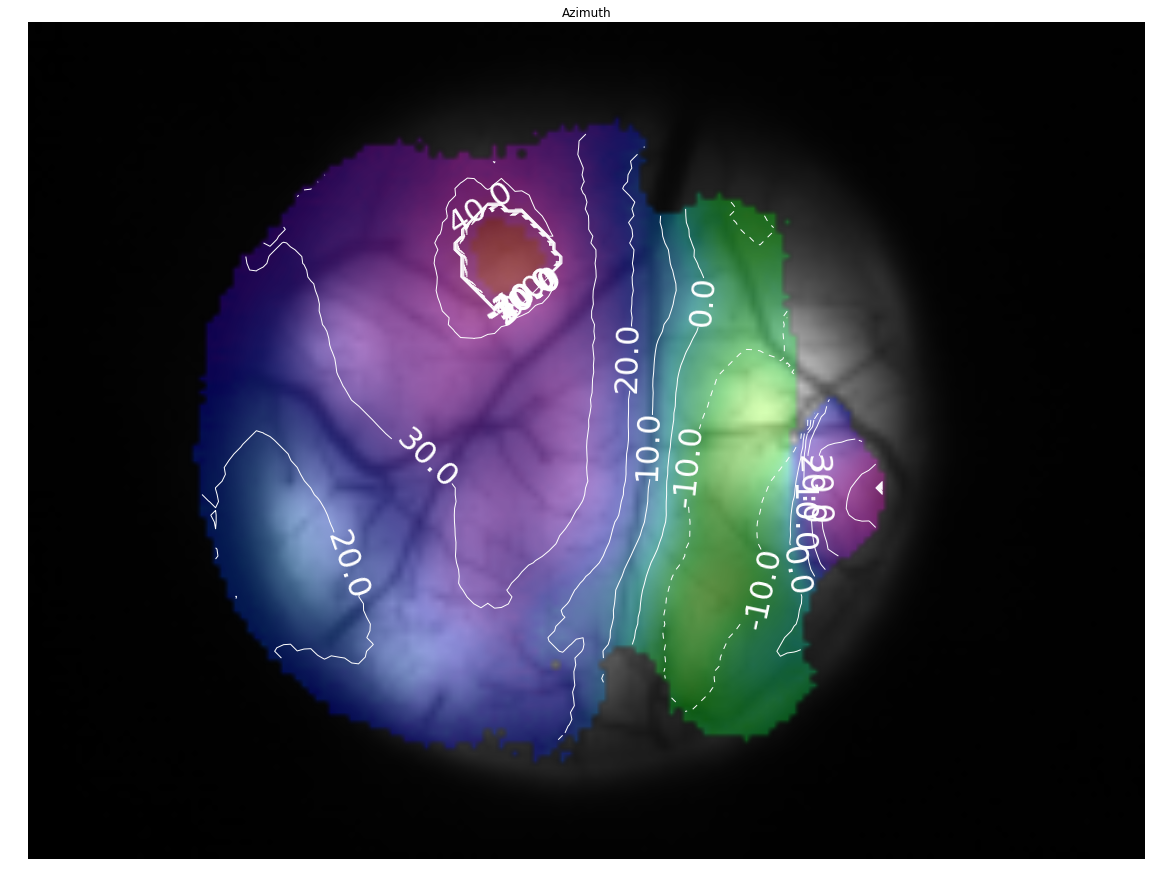

In [86]:
imgX, imgY = np.meshgrid(range(imsize[1]), range(imsize[0]))

pl.figure(figsize=(20,20))
pl.imshow(surface, cmap='gray')
#pl.subplot(1,2,1); #pl.imshow(img, cmap='gray')
#pl.imshow(az_phasemap_thr, cmap=cmap, vmin=-1*math.pi, vmax=math.pi); pl.axis('off'); #pl.colorbar()

currfig = pl.imshow(az_phasemap_thr, vmin=phasemin, vmax=phasemax,  cmap=cmap, alpha=0.3)
levels1 = range(int(np.floor(lin_coord_x.min() / interval) * interval), 
                int((np.ceil(lin_coord_x.max() / interval) + 1) * interval), interval)


im1 = pl.contour(imgX, imgY, az_phasemap_lincoord, levels1, colors='w', linewidth=linewidth)
pl.clabel(im1, levels1, fontsize=fontsize, inline=3, fmt='%1.1f') #, inline_spacing=2, manual=label_pos)
pl.axis('off')
pl.title('Azimuth')

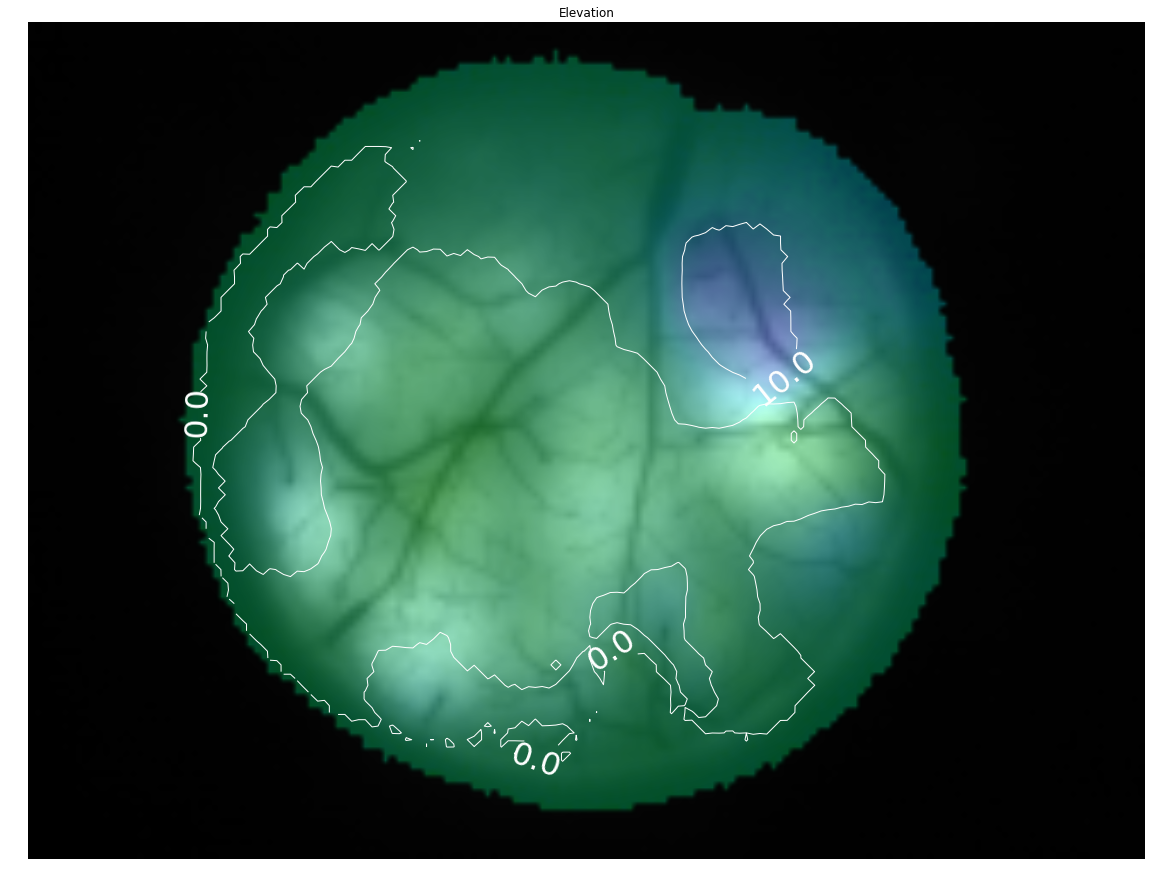

In [87]:
imgX, imgY = np.meshgrid(range(imsize[1]), range(imsize[0]))

pl.figure(figsize=(20,20))
pl.imshow(surface, cmap='gray')
#pl.subplot(1,2,1); #pl.imshow(img, cmap='gray')
#pl.imshow(az_phasemap_thr, cmap=cmap, vmin=-1*math.pi, vmax=math.pi); pl.axis('off'); #pl.colorbar()

currfig = pl.imshow(el_phasemap_thr, vmin=phasemin, vmax=phasemax,  cmap=cmap, alpha=0.3)
levels2 = range(int(np.floor(lin_coord_y.min() / interval) * interval), 
                int((np.ceil(lin_coord_y.max() / interval) + 1) * interval), interval)


im2 = pl.contour(imgX, imgY, el_phasemap_lincoord, levels2, colors='w', linewidth=linewidth)
pl.clabel(im2, levels2, fontsize=fontsize, inline=3, fmt='%1.1f') #, inline_spacing=2, manual=label_pos)
pl.axis('off')
pl.title('Elevation')

In [88]:
levels1

[-50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50]

### All together plotted:

(-0.5, 1359.5, 767.5, -0.5)

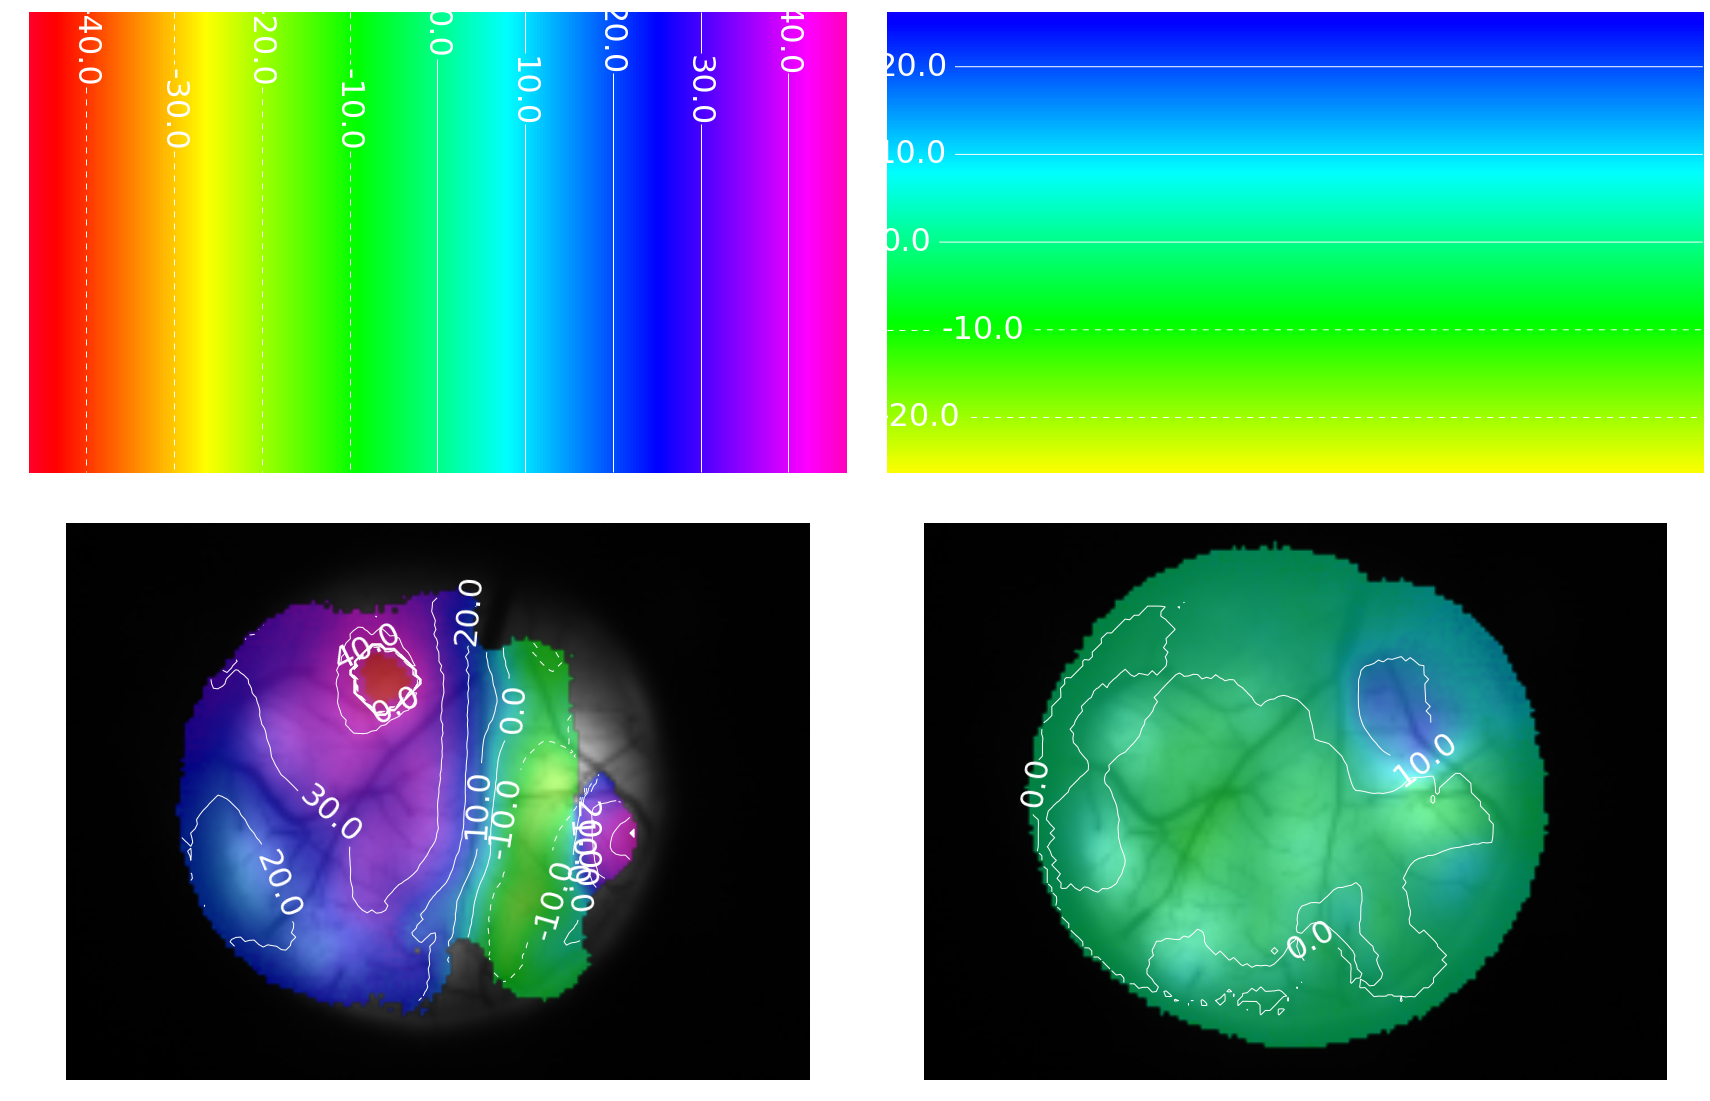

In [89]:
imgX, imgY = np.meshgrid(range(imsize[1]), range(imsize[0]))


f1 = pl.figure(figsize=(30,20))
gs1 = gridspec.GridSpec(2,2)
gs1.update(hspace=0.005, wspace=0.05)


## AZ phase map:
#pl.subplot(2,2,1)
pl.subplot(gs1[1,0])
pl.imshow(surface, cmap='gray')
currfig = pl.imshow(az_phasemap_thr, vmin=phasemin, vmax=phasemax,  cmap=cmap, alpha=0.5)
levels1 = range(int(np.floor(lin_coord_x.min() / interval) * interval), 
                int((np.ceil(lin_coord_x.max() / interval) + 1) * interval), interval)

im1 = pl.contour(imgX, imgY, az_phasemap_lincoord, levels1, colors=linecolor, linewidth=linewidth)
pl.clabel(im1, levels1, fontsize=fontsize, inline=3, fmt='%1.1f') #, inline_spacing=2, manual=label_pos)
pl.axis('off')


## EL phase map:
#pl.subplot(2,2,2)
pl.subplot(gs1[1,1])
pl.imshow(surface, cmap='gray')

currfig = pl.imshow(el_phasemap_thr, vmin=phasemin, vmax=phasemax,  cmap=cmap, alpha=0.5)
levels2 = range(int(np.floor(lin_coord_y.min() / interval) * interval), 
                int((np.ceil(lin_coord_y.max() / interval) + 1) * interval), interval)
# levels1 = range(int(np.floor(lin_coord_x.min() / interval) * interval), 
#                 int((np.ceil(lin_coord_x.max() / interval) + 1) * interval), interval)

im2 = pl.contour(imgX, imgY, el_phasemap_lincoord, levels2, colors=linecolor, linewidth=linewidth)
pl.clabel(im2, levels2, fontsize=fontsize, inline=3, fmt='%1.1f') #, inline_spacing=2, manual=label_pos)
pl.axis('off')


## AZIMUTH legend:
# pl.subplot(2,2,3)
pl.subplot(gs1[0,0])
currfig = pl.imshow(lin_coord_x, vmin=linminW, vmax=linmaxW,  cmap=cmap)
levels1 = range(int(np.floor(lin_coord_x.min() / interval) * interval), 
                int((np.ceil(lin_coord_x.max() / interval) + 1) * interval), interval)

im3 = pl.contour(mapcorX, mapcorY, lin_coord_x, levels1, colors=linecolor, linewidth=linewidth)
pl.clabel(im3, levels1, fontsize=fontsize, inline=3, fmt='%1.1f') #, inline_spacing=2, manual=label_pos)
#f1.colorbar(currfig, ticks=levels1)
pl.axis('off')


## ELEVATION legend:
# pl.subplot(2,2,4)
pl.subplot(gs1[0,1])
if short_axis is True:
    curr_fig = pl.imshow(lin_coord_y, vmin=linminH, vmax=linmaxH, cmap=cmap) #pl.colorbar()
else:
    curr_fig = pl.imshow(lin_coord_y, vmin=linminW, vmax=linmaxW, cmap=cmap) #pl.colorbar()

levels2 = range(int(np.floor(lin_coord_y.min() / interval) * interval), 
                int((np.ceil(lin_coord_y.max() / interval) + 1) * interval), interval)

im4 = pl.contour(mapcorX, mapcorY, lin_coord_y, levels2, colors=linecolor, linewidth=linewidth)
pl.clabel(im4, levels2, fontsize=fontsize, inline=3, fmt='%1.1f') #, inline_spacing=2, manual=label_pos)
pl.axis('off')

(-0.5, 163.5, 122.5, -0.5)

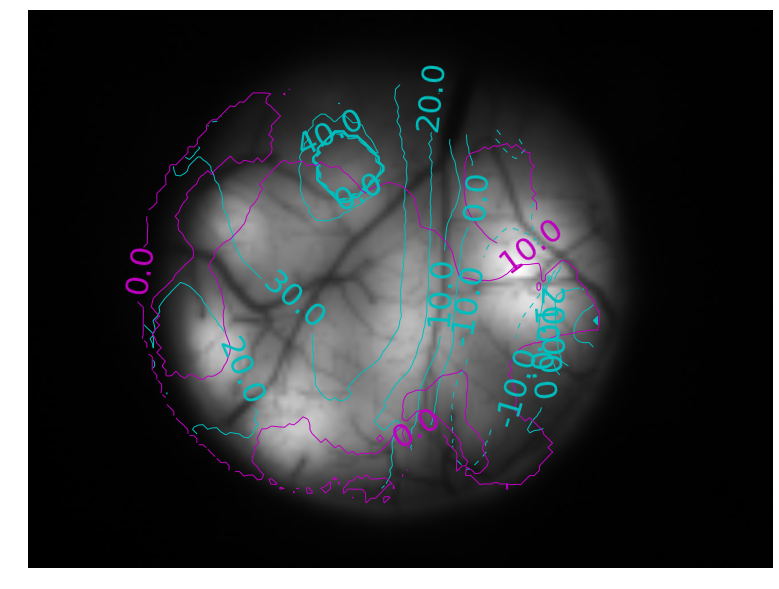

In [90]:
pl.figure(figsize=(15,10))

pl.imshow(surface, cmap='gray')

im1 = pl.contour(imgX, imgY, az_phasemap_lincoord, levels1, colors='c', linewidth=4)
pl.clabel(im1, levels1, fontsize=fontsize, inline=3, fmt='%1.1f') #, inline_spacing=2, manual=label_pos)

im2 = pl.contour(imgX, imgY, el_phasemap_lincoord, levels2, colors='m', linewidth=4)
pl.clabel(im2, levels2, fontsize=fontsize, inline=3, fmt='%1.1f') #, inline_spacing=2, manual=label_pos)
pl.axis('off')

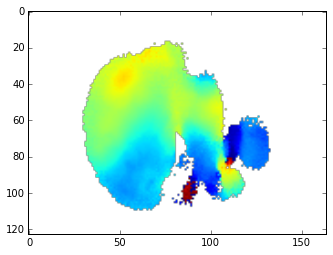

In [423]:
pl.figure()
pl.imshow(el_phasemap_thr)

In [631]:
lin_coord_x[1][0:resolution[0]/2].shape

(680,)

In [632]:
lin_coord_x.shape

(768, 1360)

### Test COMBINED runs:

In [634]:
condinfo_path = os.path.join(data_dir, 'composite', 'figures', 'CONDS.pkl')
with open(condinfo_path, 'rb') as f:
    conds = pkl.load(f)
print conds.keys()

if az_condtype=='Right':
    azdict = conds['right']
elif az_condtype=='left':
    azdict = conds['left']
if el_condtype=='Top':
    eldict = conds['top']
elif az_condtype=='Bottom':
    eldict = conds['bottom']
print azdict.keys()

azphase_combined = azdict['phase']
elphase_combined = eldict['phase']


['top', 'right', 'left', 'bottom']


<matplotlib.colorbar.Colorbar instance at 0x7f2140a1c098>

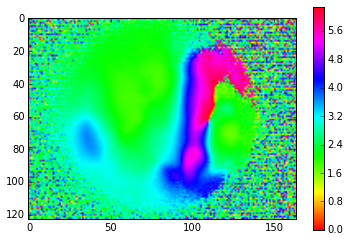

In [640]:

# Convert to continous range:

azphase_combined = -1 * azphase_combined
azphase_combined = azphase_combined % (2*np.pi)

elphase_combined = -1 * elphase_combined
elphase_combined = elphase_combined % (2*np.pi)

pl.imshow(azphase_combined, cmap='hsv'); pl.colorbar()